In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7b3a53bd-41b4-a73b-b8cd-e03887f1e49b)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 


--2022-07-07 13:42:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-07-07 13:42:20 (49.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.shape

(2787, 5)

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


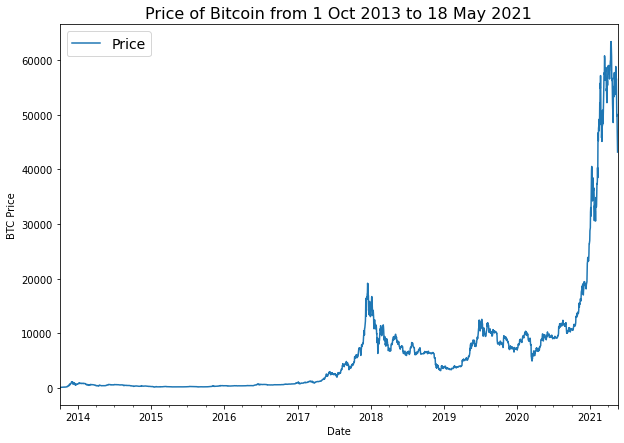

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

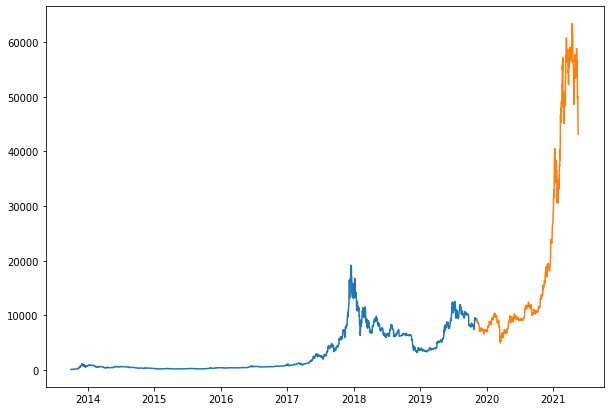

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
# plt.figsize(10,7)

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

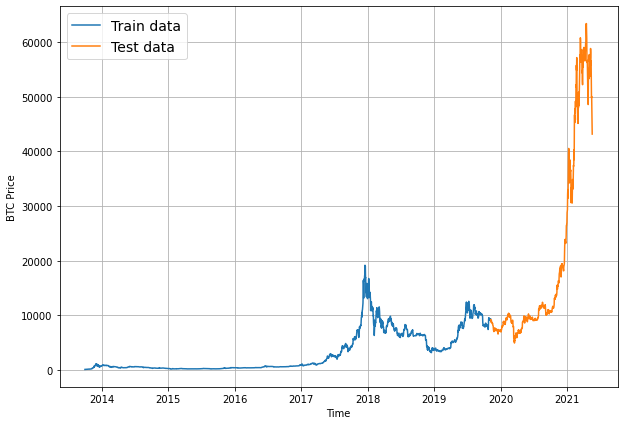

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train,format = '-', label="Train data")
plot_time_series(timesteps=X_test, values=y_test, format = '-',label="Test data")

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) 
  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
import numpy as np

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
def get_labelled_windows(x, horizon=1):

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):s
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0,
                                            save_best_only=True) 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([            
  layers.Dense(128, activation="relu",input_shape=[7]),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it



In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 3s 37ms/step - loss: 780.3455 - mae: 780.3455 - val_loss: 2279.6528 - val_mae: 2279.6528
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 247.6756 - mae: 247.6756 - val_loss: 1005.9993 - val_mae: 1005.9993
Epoch 3/100
18/18 [==============================] - 1s 32ms/step - loss: 188.4116 - mae: 188.4116 - val_loss: 923.2862 - val_mae: 923.2861
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 169.4340 - mae: 169.4340 - val_loss: 900.5872 - val_mae: 900.5872
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 165.0894 - mae: 165.0894 - val_loss: 895.2237 - val_mae: 895.2237
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 158.5210 - mae: 158.5210 - val_loss: 855.1984 - val_mae: 855.1984
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 151.3566 - mae: 151.3566 - val_loss: 840.9166 - val_mae: 840.9166
Epoch 8/100
18/1

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758


[585.9757690429688, 585.9757690429688]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510


[568.9510498046875, 568.9510498046875]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
model_1_preds = make_preds(model_1,
                           input_data=test_windows)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

Model 2 with Window Size = 30 and Horizon = 1

In [ ]:
prices.shape

(2787,)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
model_2 = tf.keras.Sequential([            
  layers.Dense(128, activation="relu",input_shape=[30]),
  layers.Dense(HORIZON, activation="linear")                         
], name="model_2_dense")

In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

In [ ]:
model_2.fit(x=train_windows,y = train_labels,epochs=100,batch_size=128,validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 1355.7623 - mae: 1355.7623 - val_loss: 3228.6929 - val_mae: 3228.6929
Epoch 2/100
18/18 [==============================] - 1s 47ms/step - loss: 440.8260 - mae: 440.8260 - val_loss: 2100.2908 - val_mae: 2100.2908
Epoch 3/100
18/18 [==============================] - 0s 29ms/step - loss: 324.9239 - mae: 324.9239 - val_loss: 1438.4036 - val_mae: 1438.4036
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 276.5896 - mae: 276.5896 - val_loss: 1331.1700 - val_mae: 1331.1700
Epoch 5/100
18/18 [==============================] - 1s 48ms/step - loss: 235.3472 - mae: 235.3472 - val_loss: 1217.5149 - val_mae: 1217.5149
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 230.5899 - mae: 230.5899 - val_loss: 1255.8611 - val_mae: 1255.8611
Epoch 7/100
18/18 [==============================] - 0s 26ms/step - loss: 207.3077 - mae: 207.3077 - val_loss: 1111.1659 - val_mae: 1111.1659
Epoch

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 614.1074 - mae: 614.1074


[614.1073608398438, 614.1073608398438]

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.2637 - mae: 608.2637


[608.2637329101562, 608.2637329101562]

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.2637,
 'mape': 2.754868,
 'mase': 1.0632509,
 'mse': 1268798.4,
 'rmse': 1126.4094}

Model 3 with Horizon 7 and window size 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=7)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_labels.shape

(2200, 7)

In [ ]:
model_3 = tf.keras.Sequential([            
  layers.Dense(128, activation="relu",input_shape=[30]),
  layers.Dense(7, activation="linear")                         
], name="model_3_dense")

In [ ]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

In [ ]:
model_3.fit(x=train_windows,y = train_labels,epochs=100,batch_size=128,validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 1195.5991 - mae: 1195.5991 - val_loss: 2683.7605 - val_mae: 2683.7605
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 480.9742 - mae: 480.9742 - val_loss: 2431.5532 - val_mae: 2431.5532
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 398.5112 - mae: 398.5112 - val_loss: 2046.8425 - val_mae: 2046.8425
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 359.2373 - mae: 359.2373 - val_loss: 1832.0518 - val_mae: 1832.0518
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 327.4305 - mae: 327.4305 - val_loss: 1893.1305 - val_mae: 1893.1305
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 306.4804 - mae: 306.4804 - val_loss: 1753.3362 - val_mae: 1753.3362
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 291.7403 - mae: 291.7403 - val_loss: 1547.2906 - val_mae: 1547.2906
Epoch

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1331.4519 - mae: 1331.4519


[1331.451904296875, 1331.451904296875]

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1235.0481 - mae: 1235.0481


[1235.048095703125, 1235.048095703125]

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

In [ ]:
model_3_preds.shape

TensorShape([551, 7])

In [ ]:
tf.squeeze(test_labels).shape

TensorShape([551, 7])

In [ ]:
model_3_results = evaluate_preds(y_true=(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 689.2882  ,  451.09445 ,  420.09235 ,  651.57855 ,  631.4697  ,
         768.9076  ,  706.0417  ,  580.3162  ,  558.90564 ,  655.1476  ,
         840.9139  ,  821.2835  ,  949.2562  , 1022.13885 ,  687.09705 ,
         290.50537 ,  144.1725  ,  224.32324 ,  242.25621 ,  240.04744 ,
         203.81662 ,  242.80203 ,  394.77643 ,  377.3284  ,  282.7097  ,
         200.85149 ,  112.85136 ,  184.92961 ,  218.26785 ,  220.07346 ,
         299.49652 ,  432.64877 ,  396.521   ,  346.15717 ,  353.59933 ,
         340.58463 ,  391.7193  ,  268.27963 ,  290.852   ,  162.02316 ,
         432.2679  ,   68.27344 ,  104.70634 ,  103.38135 ,  221.23305 ,
         192.03662 ,  146.6425  ,  147.57143 ,  134.21756 ,  121.84696 ,
         191.99707 ,  170.48772 ,  246.9218  ,  230.1949  ,  241.80344 ,
         286.37842 ,  473.5925  ,  383.3738  ,  451.78857 ,  429.2518  ,
         253.55643 ,  185.31947 ,  287.50705 ,  250.61879 ,  332.15543 ,
         417.6487  ,  401.41776 ,  366.72113

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1235.048,
 'mape': 5.651709,
 'mase': 2.197699,
 'mse': 5353134.0,
 'rmse': 1421.0953}

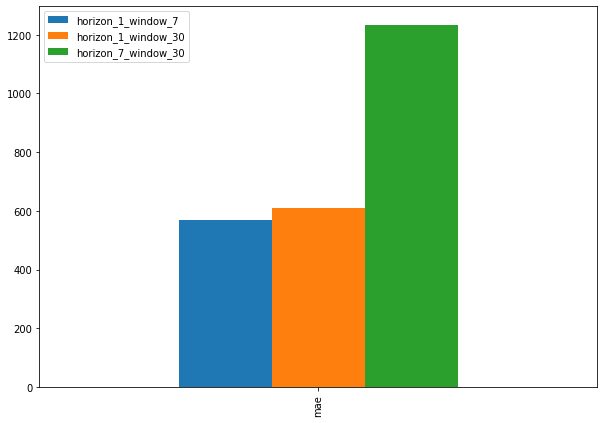

In [ ]:
pd.DataFrame({
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Model 4 CNN


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Input(shape=[7]),
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 566.6482


566.648193359375

In [ ]:
model_4_preds = make_preds(model_4,
                           input_data=test_windows)

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 566.64813,
 'mape': 2.5340497,
 'mase': 0.9954438,
 'mse': 1166934.4,
 'rmse': 1080.2473}

LSTM and Functional API

In [ ]:
inputs = layers.Input(shape=7)
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
# x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128,activation="relu")(x)
# x = layers.Dense(32,activation="relu")(x)
output = layers.Dense(1)(x)

model_5 = tf.keras.Model(inputs=inputs,outputs=output , name = "model_5_LSTM")

model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())
# model_5.fit()
model_5.fit(train_windows,train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])



Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2304.9324 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 104ms/step - loss: 2139.2766 - val_loss: 9927.1904
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1004.4435INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 731.0870 - val_loss: 1635.5063
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 282.3691INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 259.2578 - val_loss: 1499.8594
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 226.3638INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 209.9523 - val_loss: 1135.7137
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 202.3517 - val_loss: 1143.1317
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 199.5539INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 42s 2s/step - loss: 201.9730 - val_loss: 1117.9882
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 202.7060 - val_loss: 1127.7017
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 198.5418 - val_loss: 1133.0786
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 197.2849INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 195.9865 - val_loss: 1114.0348
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 189.5156INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 194.6013 - val_loss: 1092.9585
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 202.8335INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 194.4484 - val_loss: 1086.3687
Epoch 12/100
11/18 [=================>............] - ETA: 0s - loss: 197.1869INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 192.8924 - val_loss: 1079.2312
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 185.5743INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 189.4783 - val_loss: 1065.8386
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 187.7629 - val_loss: 1095.2980
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 181.9450INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 187.4379 - val_loss: 1057.7898
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 181.9223INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 183.6945 - val_loss: 1020.5751
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 181.6160 - val_loss: 1090.1969
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 180.7444 - val_loss: 1062.7217
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 178.1673 - val_loss: 1057.9030
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 181.4668INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 177.6177 - val_loss: 978.9029
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 174.0513 - val_loss: 987.5705
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 172.0608 - val_loss: 980.1389
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 171.6360 - val_loss: 1003.0302
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 162.6575INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 167.9759 - val_loss: 972.9758
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 174.0865INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 166.2581 - val_loss: 933.2557
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 164.6081INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 163.9650 - val_loss: 926.7688
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 162.3411 - val_loss: 931.5101
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 160.1513INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 160.2843 - val_loss: 899.0823
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 158.1200 - val_loss: 912.4013
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 153.5794INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 156.8867 - val_loss: 893.6785
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 156.3847INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 154.0330 - val_loss: 858.4866
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 152.9377 - val_loss: 879.7325
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 150.2618 - val_loss: 874.8644
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 154.1796INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 149.0646 - val_loss: 824.2272
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 146.0906 - val_loss: 828.2187
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 143.3805INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 146.0914 - val_loss: 795.7015
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 142.2539 - val_loss: 799.9423
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 146.0926INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 140.8987 - val_loss: 777.9515
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 141.3183INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 140.7170 - val_loss: 771.5110
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 141.1112 - val_loss: 812.9876
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 142.7395INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 203ms/step - loss: 138.4628 - val_loss: 750.9476
Epoch 42/100
18/18 [==============================] - 0s 14ms/step - loss: 135.6103 - val_loss: 760.9326
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 129.5879INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 134.1142 - val_loss: 739.8857
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 131.7329INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 132.1508 - val_loss: 727.9069
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 126.6745INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 126ms/step - loss: 130.7930 - val_loss: 721.8896
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 137.8872INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 131.5360 - val_loss: 717.3784
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 129.2982 - val_loss: 733.7682
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 125.8013INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 128.5533 - val_loss: 707.7654
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9641 - val_loss: 708.7751
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 129.5545 - val_loss: 713.0885
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 126.5303 - val_loss: 791.4520
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 136.1297INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 127.6303 - val_loss: 679.0835
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 122.9001INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 124.0614 - val_loss: 674.2990
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 125.0902 - val_loss: 679.5449
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 128.6601INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 122.4487 - val_loss: 664.7197
Epoch 56/100
10/18 [===============>..............] - ETA: 0s - loss: 128.0458INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 124.0083 - val_loss: 662.4432
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 129.0361 - val_loss: 707.1349
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 124.0354INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 121.9956 - val_loss: 655.0557
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 117.2445INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 120.0676 - val_loss: 651.4005
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 120.1442INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 120.1481 - val_loss: 649.0332
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 119.3061 - val_loss: 654.4642
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4433 - val_loss: 666.8519
Epoch 63/100
11/18 [=================>............] - ETA: 0s - loss: 127.7714INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 122.8665 - val_loss: 644.6285
Epoch 64/100
11/18 [=================>............] - ETA: 0s - loss: 123.9786INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 119.0315 - val_loss: 637.0373
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 119.6353INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 118.1152 - val_loss: 634.4185
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 117.5095 - val_loss: 636.9892
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 115.7905INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 119.8359 - val_loss: 630.8096
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 121.7472INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 121.2240 - val_loss: 627.7166
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5887 - val_loss: 646.4833
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 119.0218 - val_loss: 628.4145
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 116.7828 - val_loss: 640.2659
Epoch 72/100
12/18 [===================>..........] - ETA: 0s - loss: 117.2544INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 118.8364 - val_loss: 621.1782
Epoch 73/100
11/18 [=================>............] - ETA: 0s - loss: 117.2183INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 115.7048 - val_loss: 620.3293
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4556 - val_loss: 625.0700
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2315 - val_loss: 643.3343
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8408 - val_loss: 663.1083
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 120.3656 - val_loss: 699.1687
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 119.7822 - val_loss: 641.9578
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 113.6258INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 115.8726 - val_loss: 615.6743
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4398 - val_loss: 619.2653
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4927 - val_loss: 645.5693
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 121.6150INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 117.8479 - val_loss: 614.8277
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3536 - val_loss: 622.1823
Epoch 84/100
12/18 [===================>..........] - ETA: 0s - loss: 110.8037INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 114.8627 - val_loss: 612.2230
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6945 - val_loss: 623.9473
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7534 - val_loss: 644.0273
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 121.8184INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 116.4750 - val_loss: 605.0909
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8032 - val_loss: 608.1089
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9726 - val_loss: 635.4024
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 117.9216 - val_loss: 672.8141
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0690 - val_loss: 610.9871
Epoch 92/100
11/18 [=================>............] - ETA: 0s - loss: 113.6810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 113.8908 - val_loss: 602.7621
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8957 - val_loss: 619.8756
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8127 - val_loss: 641.4161
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3950 - val_loss: 605.7841
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4335 - val_loss: 621.4622
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8565 - val_loss: 613.6622
Epoch 98/100
12/18 [===================>..........] - ETA: 0s - loss: 114.0598INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 112.4094 - val_loss: 601.8885
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 110.5917INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 111.3180 - val_loss: 595.4095
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9812 - val_loss: 599.4486


In [ ]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 599.4485


599.4485473632812

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 595.4095


595.4094848632812

In [ ]:
# model_5.summary()

In [ ]:
model_5_preds = make_preds(model_5,
                           input_data=test_windows)

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 595.4095,
 'mape': 2.679088,
 'mase': 1.0459696,
 'mse': 1263472.1,
 'rmse': 1124.0427}

Multivariate

Let's add about halving event of bitcoin block

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
bitcoin_prices["Block_Reward"] = 0

In [ ]:
bitcoin_prices.loc[:"2016-07-08","Block_Reward"] = 25
bitcoin_prices.loc["2016-07-09":"2020-05-10","Block_Reward"] = 12.5
bitcoin_prices.loc["2020-05-11":,"Block_Reward"] = 6.25

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices[["Price", "Block_Reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices.columns,
                                     index=bitcoin_prices.index)

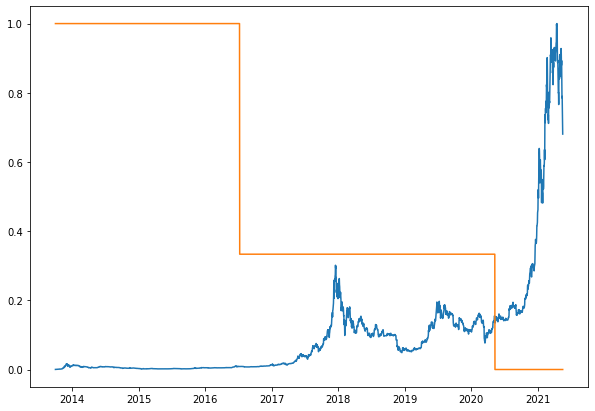

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(scaled_price_block_df)
plt.show()

In [ ]:
bitcoin_prices_windowed = bitcoin_prices.copy()

In [ ]:
for i in range(WINDOW_SIZE): 
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,Block_Reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,Block_Reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
model_6 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Input(shape=[8]),
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_multivariate")

In [ ]:
model_6.summary()

Model: "model_6_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_10 (Lambda)          (None, 1, 8)              0         
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 128)            5248      
                                                                 
 dense_17 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, 
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 571.5125


571.5125122070312

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8879.089, 8786.909, 9014.705, 8779.222, 8737.807, 8749.982,
       8678.729, 8519.957, 8465.068, 8520.318], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results 

{'mae': 571.5125,
 'mape': 2.5521421,
 'mase': 1.0039892,
 'mse': 1182598.0,
 'rmse': 1087.4731}

In [ ]:
arr = [1 for i in range(4)]

In [ ]:
arr2 = [1]*4

[1, 1, 1, 1]

N-Beats Algorithm

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int , theta_size:int, horizon: int, n_neurons: int , n_layers: int,**kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons,activation = "relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name = "theta")

  def call(self,inputs):
    x = inputs
    for l in self.hidden:
      x = l(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(7):
  bitcoin_prices_nbeats["Price "+str(i+1)] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna(inplace=True)

In [ ]:
bitcoin_prices_nbeats

,Price,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices_nbeats.drop("Price",axis=1)
y = bitcoin_prices_nbeats["Price"]
size = int(0.8*X.shape[0])
X_train = X[:size]
y_train = y[:size]
X_test = X[size:]
y_test = y[size:]



In [ ]:
X_train.shape

(2224, 7)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024 
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
for i,j in enumerate(range(N_STACKS-1)):
  print(i==j) 


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
print(tensor_1.shape)
print(tensor_2.shape)
# Subtract
subtracted = layers.subtract([tensor_1, tensor_2],name = "Helllo")

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

(10,)
(10,)
Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time 
tf.random.set_seed(42)
n_beats_block = NBeatsBlock(input_size= INPUT_SIZE ,theta_size= THETA_SIZE, horizon= HORIZON, n_neurons= N_NEURONS , n_layers = N_LAYERS, name = "InitialBlock")

input_layer = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

backcast, forecast = n_beats_block(input_layer)
# print(input_layer.shape)
# print(backcast.shape)
# residuals = layers.Subtract(name = "Subtract_0")
residuals = layers.subtract([input_layer,backcast], name = "Subtract_0")

for i, _ in  enumerate(range(N_STACKS-1)):

  backcast,n_forecast = NBeatsBlock(input_size= INPUT_SIZE ,theta_size= THETA_SIZE, horizon= HORIZON, n_neurons= N_NEURONS , n_layers = N_LAYERS, name = "NBlock"+str(i+1))(residuals)

  residuals = layers.subtract([residuals,backcast],name = "Subtract_"+str(i+1))

  forecast = layers.add([forecast,n_forecast],name = "Add_"+str(i+1))


model_7 = tf.keras.Model(inputs=input_layer, outputs=forecast, name="model_7_N-BEATS")

model_7.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae", "mse"])


# model_7.summary()

model_7.fit(train_dataset,epochs=N_EPOCHS,validation_data=test_dataset,
            verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 337: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 437: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 22s, sys: 2.35 s, total: 1min 24s
Wall time: 1min 46s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 37ms/step - loss: 570.8663 - mae: 570.8663 - mse: 1151625.5000


[570.8663330078125, 570.8663330078125, 1151625.5]

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.703, 8870.127, 9077.285, 8773.876, 8794.102, 8824.232,
       8651.396, 8553.095, 8542.367, 8541.075], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 570.86633,
 'mape': 2.6759963,
 'mase': 1.002854,
 'mse': 1151625.5,
 'rmse': 1073.1382}

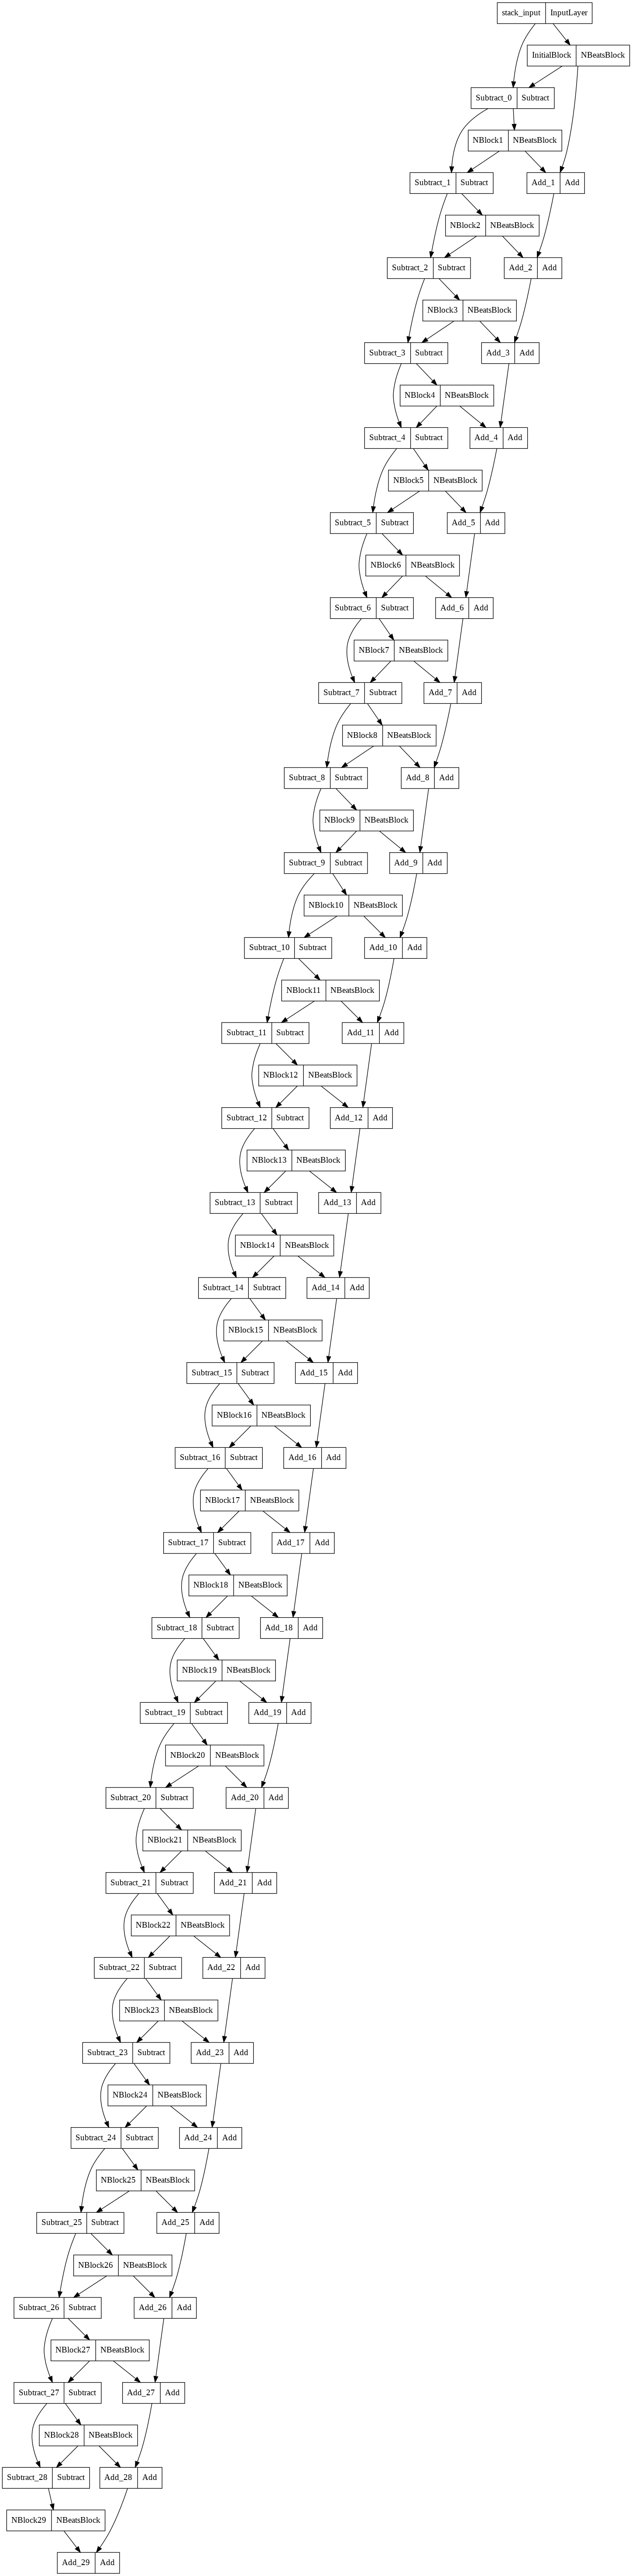

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Ensembling 

In [ ]:
def get_ensemble_models(horizon=HORIZON, train_data = train_dataset, test_data = test_dataset, num_iter = 10, num_epochs = 100, loss_fns=["mae", "mse", "mape"]):
  ensemble_models = []

  for i in range(num_iter):
    for lf in loss_fns:
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)   
      ])
      model.compile(loss=lf,optimizer=tf.keras.optimizers.Adam(),metrics=["mae", "mse"])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)
  
  return ensemble_models





In [ ]:
ensemble_models = get_ensemble_models(num_iter=5,num_epochs=1000)


Epoch 578: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 678: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 630: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 730: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 222: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 322: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 352: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 453: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 553: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 187: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 650: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 259: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 974: ReduceLROnPlateau reducing l

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8788.269,  8800.912,  9082.253, ..., 50142.312, 48402.594,
        46064.375],
       [ 8847.083,  8748.965,  9072.109, ..., 49372.758, 48218.39 ,
        45153.78 ],
       [ 8778.265,  8747.433,  9018.219, ..., 49830.59 , 47727.805,
        45768.98 ],
       ...,
       [ 8762.076,  8839.617,  9047.434, ..., 50613.402, 48409.11 ,
        45880.34 ],
       [ 8792.734,  8738.186,  8978.186, ..., 49970.27 , 48886.566,
        46962.82 ],
       [ 8823.337,  8800.67 ,  9086.044, ..., 50081.39 , 47928.363,
        45530.777]], dtype=float32)>

In [ ]:
import numpy as np
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 568.51764,
 'mape': 2.582436,
 'mase': 0.99872804,
 'mse': 1142483.4,
 'rmse': 1068.8701}

In [ ]:
def get_bound(preds):
  std = tf.math.reduce_std(preds,axis=0)
  interval = 1.96*std
  preds_mean = tf.reduce_mean(preds,axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower,upper = get_bound(preds=ensemble_preds)



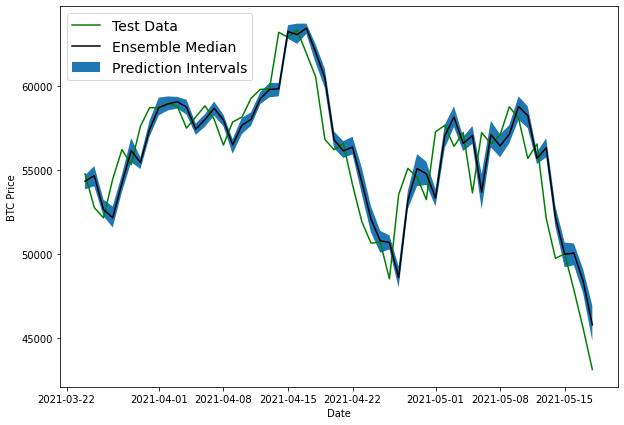

In [ ]:
offset = 500
ensemble_median = np.median(ensemble_preds,axis=0)
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Model 9 : Lets dive into the future

In [ ]:
bitcoin_prices_future = bitcoin_prices.copy()
for i in range(7):
  bitcoin_prices_future["Price "+str(i+1)] = bitcoin_prices_future["Price"].shift(periods=i+1)
bitcoin_prices_future.dropna(inplace=True)


In [ ]:
X_all = bitcoin_prices_future.drop(["Price"], axis=1).dropna().to_numpy() 
y_all = bitcoin_prices_future.dropna()["Price"].to_numpy()

In [ ]:
X_all

array([[  121.795     ,   120.65533   ,   121.33866   , ...,
          108.58483   ,   125.455     ,   123.65499   ],
       [  123.033     ,   121.795     ,   120.65533   , ...,
          118.67466   ,   108.58483   ,   125.455     ],
       [  124.049     ,   123.033     ,   121.795     , ...,
          121.33866   ,   118.67466   ,   108.58483   ],
       ...,
       [50032.69313676, 49764.1320816 , 52147.82118698, ...,
        55715.54665129, 58102.19142623, 58788.20967893],
       [47885.62525472, 50032.69313676, 49764.1320816 , ...,
        56573.5554719 , 55715.54665129, 58102.19142623],
       [45604.61575361, 47885.62525472, 50032.69313676, ...,
        52147.82118698, 56573.5554719 , 55715.54665129]])

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024 
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])


model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())


model_9.fit(dataset_all,
            epochs=100,
            verbose=0) 

In [ ]:
FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] 
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,model=model_9,into_future=FUTURE,window_size=WINDOW_SIZE)

In [ ]:
future_forecast

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D") 
  end_date = start_date + np.timedelta64(into_future, "D") 
  return np.arange(start_date, end_date, dtype="datetime64[D]") 

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep, into_future=FUTURE)
next_time_steps = next_time_steps[:15]

In [ ]:
last_price = bitcoin_prices.iloc[-1]["Price"]

In [ ]:
future_forecast.insert(0,last_price)
next_time_steps = np.insert(next_time_steps,0,last_timestep)

In [ ]:
future_data = pd.DataFrame({"Date":next_time_steps,"Price":future_forecast})
future_data = future_data.set_index("Date")

In [ ]:
future_data

,Price
Date,
2021-05-18,43144.471291
2021-05-19,55764.472656
2021-05-20,50985.929688
2021-05-21,48522.960938
2021-05-22,48137.199219
2021-05-23,47880.632812
2021-05-24,46879.714844
2021-05-25,48227.593750
2021-05-26,53963.683594


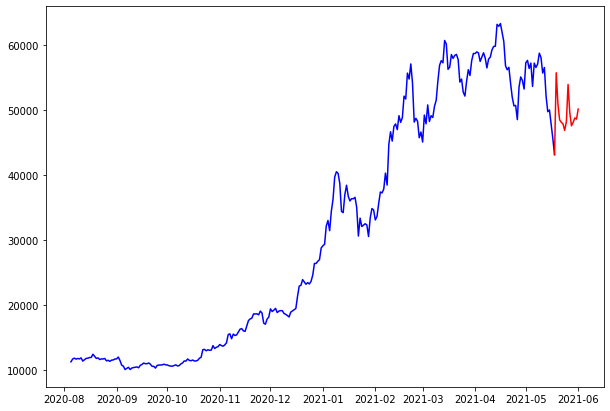

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(bitcoin_prices.index, sta format="-", label="Actual BTC Price")
plt.plot(bitcoin_prices[2500:],color='b')
plt.plot(future_data,color='r')
# plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")